   age   sex               cp  trestbps  chol fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   1  lv hypertrophy     150   
1   41  Male  atypical angina       135   203   0          normal     132   
2   57  Male     asymptomatic       140   192   0          normal     148   
3   52  Male   typical angina       118   186   0  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201   0          normal     126   

  exang  oldpeak        slope          thal  num  
0     0      2.3  downsloping  fixed defect    0  
1     0      0.0         flat  fixed defect    0  
2     0      0.4         flat  fixed defect    0  
3     0      0.0         flat  fixed defect    0  
4     1      1.5         flat  fixed defect    0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs    

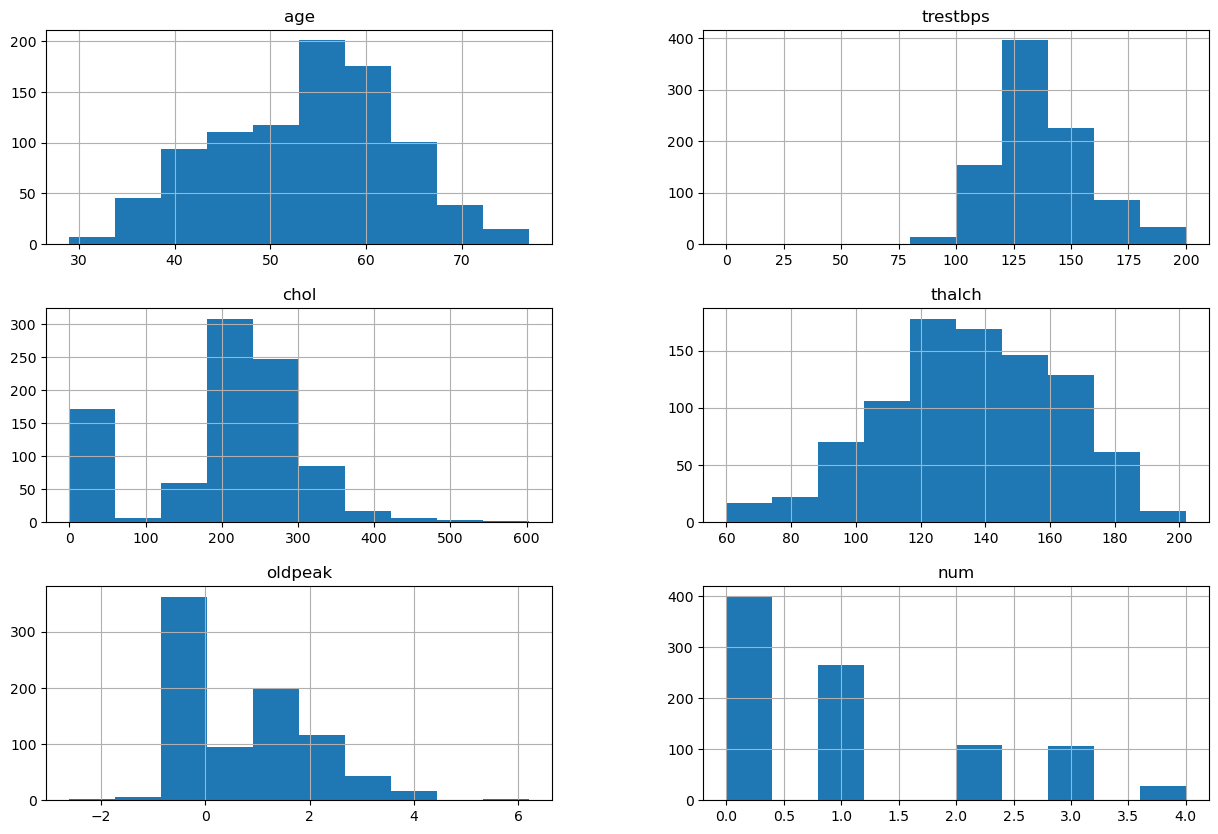

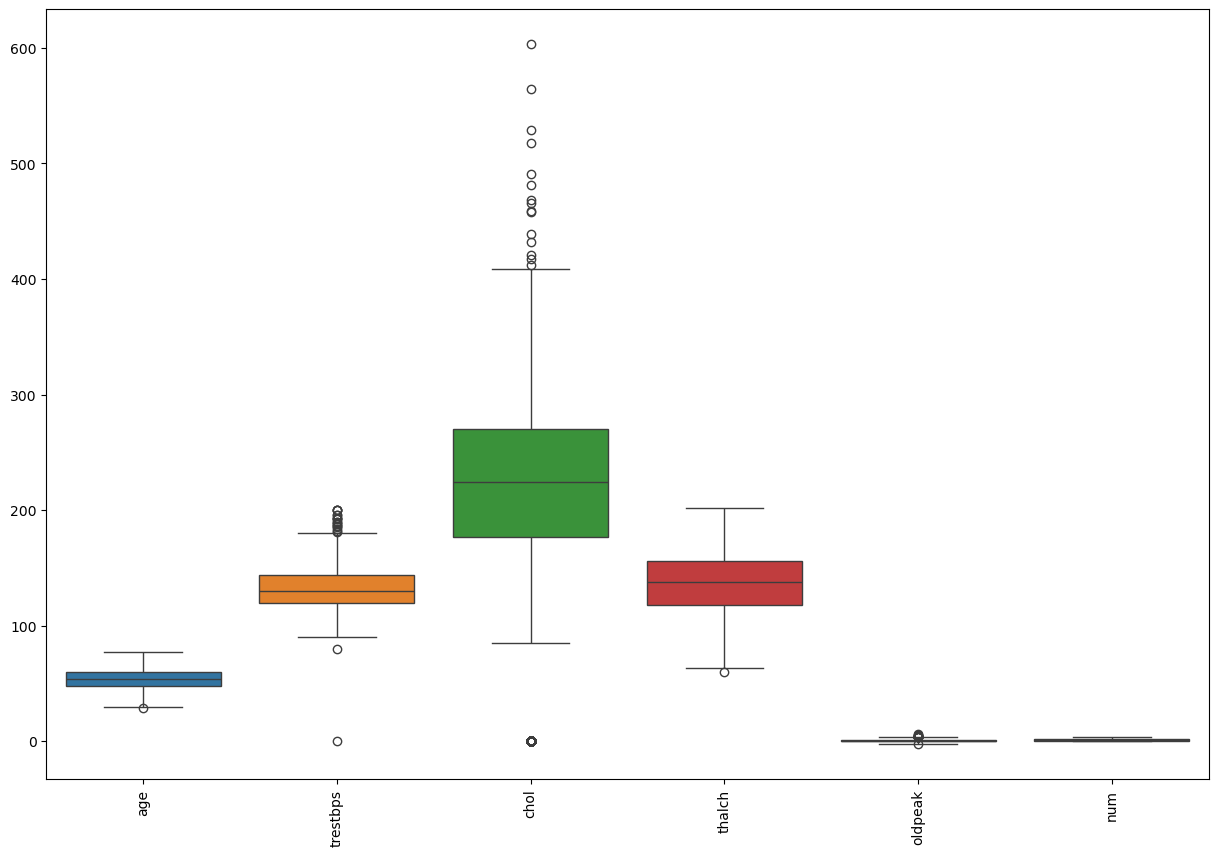

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14676\3420628051.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


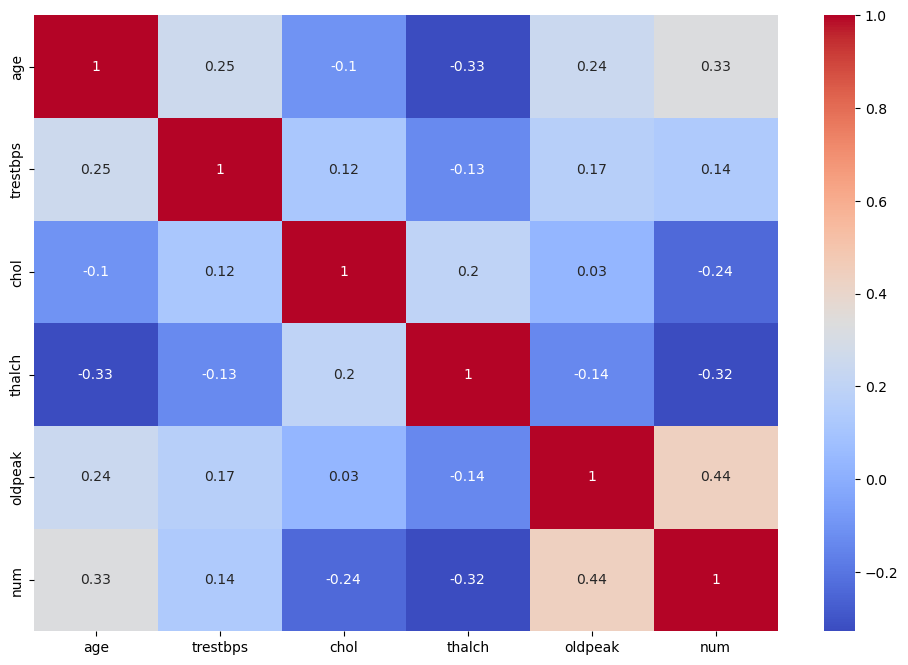

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14676\3420628051.py:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


data = pd.read_csv("heart_Disease.csv")

# rows of the dataset
print(data.head())

# the target column
print(data.columns)

# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Summary statistics
summary_stats = data.describe()
print(summary_stats)

# Visualizing the distribution of features
data.hist(figsize=(15, 10))
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Handling missing values
data.fillna(data.mean(), inplace=True)

# Encoding categorical variables 
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Create age groups
bins = [0, 30, 55, 100]  # Define age range
labels = ['Young', 'Middle-aged', 'Senior']  # Define group labels
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Encoding the new target variable
le_age_group = LabelEncoder()
data['age_group'] = le_age_group.fit_transform(data['age_group'])

# Dropping the original age column
data = data.drop(columns=['age'])



In [30]:
# Scaling numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

# Spliting the dataset
X = data.drop(columns=['age_group'])  # Use the new target column
y = data['age_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



   sex  cp  trestbps      chol  fbs  restecg    thalch  exang   oldpeak  \
0    1   3  0.567394  0.281297    1        0  0.524183      0  1.334996   
1    1   1  0.076967  0.013526    0        1 -0.147705      0 -0.844594   
2    1   0  0.322181 -0.084656    0        1  0.449529      0 -0.465535   
3    1   3 -0.756760 -0.138211    0        0  2.017268      0 -0.844594   
4    1   0 -1.149102 -0.004325    0        1 -0.371668      1  0.576878   

   slope  thal       num  age_group  
0      0     0 -0.881977          1  
1      1     0 -0.881977          0  
2      1     0 -0.881977          1  
3      1     0 -0.881977          0  
4      1     0 -0.881977          1  


In [31]:
# Implement Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Print classification report
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=le_age_group.classes_))



Accuracy: 0.6538461538461539
Precision: 0.6547880491542464
Recall: 0.6538461538461539
F1-score: 0.6542975200546043
              precision    recall  f1-score   support

 Middle-aged       0.72      0.71      0.72       112
      Senior       0.55      0.56      0.55        70
       Young       0.00      0.00      0.00         0

    accuracy                           0.65       182
   macro avg       0.42      0.42      0.42       182
weighted avg       0.65      0.65      0.65       182



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-pac

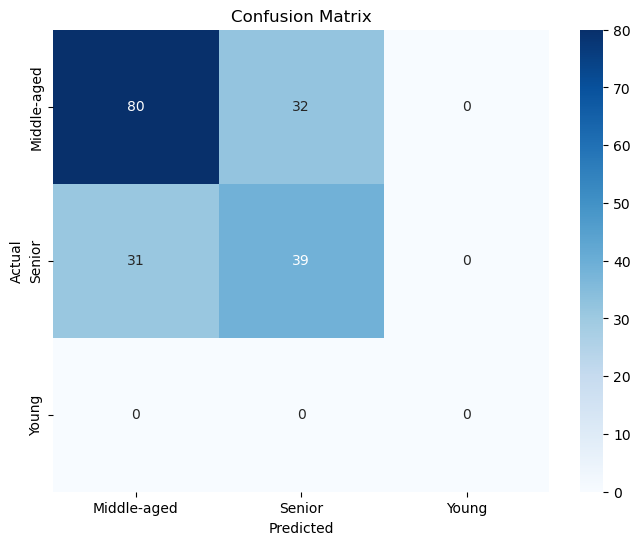

In [32]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=le_age_group.classes_, yticklabels=le_age_group.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Accuracy (Best): 0.6978021978021978
Precision (Best): 0.6914809043787961
Recall (Best): 0.6978021978021978
F1-score (Best): 0.6919905099024347
              precision    recall  f1-score   support

 Middle-aged       0.73      0.80      0.77       112
      Senior       0.63      0.53      0.57        70
       Young       0.00      0.00      0.00         0

    accuracy                           0.70       182
   macro avg       0.45      0.44      0.45       182
weighted avg       0.69      0.70      0.69       182



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-pac

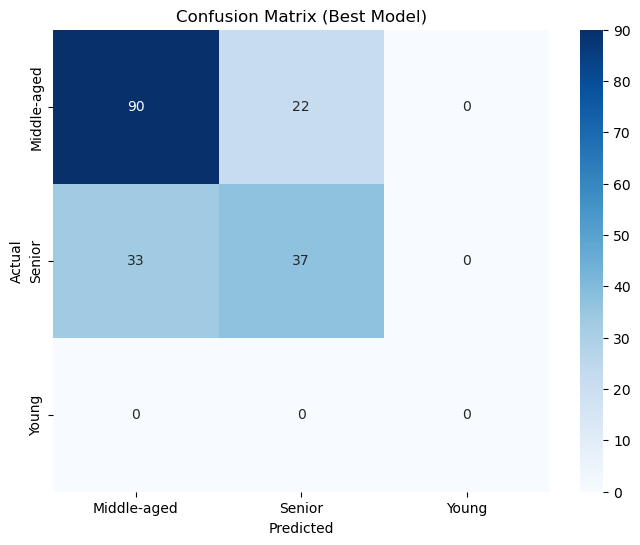

In [33]:
# Hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# Evaluate the best model
y_pred_best = best_clf.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Print the metrics for the best model
print(f'Accuracy (Best): {accuracy_best}')
print(f'Precision (Best): {precision_best}')
print(f'Recall (Best): {recall_best}')
print(f'F1-score (Best): {f1_best}')

# Print classification report for the best model
print(classification_report(y_test, y_pred_best, labels=[0, 1, 2], target_names=le_age_group.classes_))

# Confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, cmap='Blues', fmt='g', xticklabels=le_age_group.classes_, yticklabels=le_age_group.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

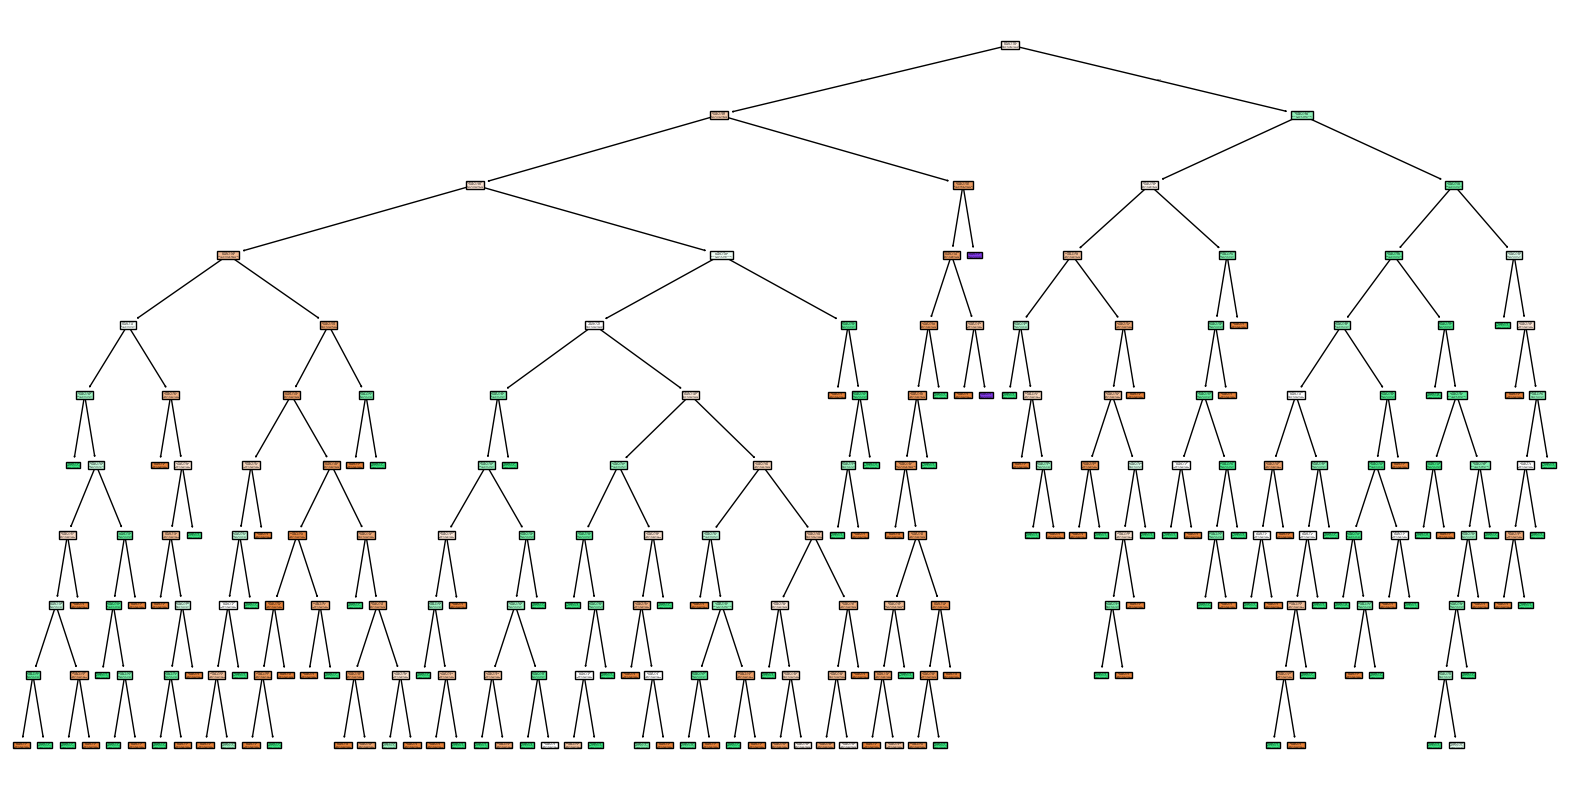

In [28]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=le_age_group.classes_, filled=True)
plt.show()
